<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="small_images.jpg" />

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

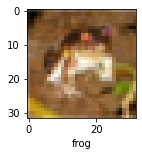

In [ ]:
plot_sample(X_train, y_train, 0)

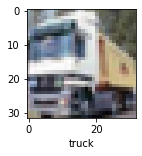

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8110 - accuracy: 0.3570
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6244 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5410 - accuracy: 0.4574
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4858 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4344 - accuracy: 0.4952


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.4388 - accuracy: 0.4889


[1.4387644529342651, 0.48890000581741333]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.57      1000
           1       0.67      0.50      0.57      1000
           2       0.32      0.49      0.39      1000
           3       0.38      0.32      0.35      1000
           4       0.55      0.24      0.33      1000
           5       0.42      0.35      0.38      1000
           6       0.47      0.61      0.53      1000
           7       0.60      0.51      0.55      1000
           8       0.63      0.61      0.62      1000
           9       0.47      0.67      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [ ]:
cnn5 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn5.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4931 - accuracy: 0.4654
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1239 - accuracy: 0.6073
Epoch 3/5
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0003 - accuracy: 0.6501
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9184 - accuracy: 0.6820
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8609 - accuracy: 0.7003


In [ ]:
cnn5.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9238 - accuracy: 0.6784


[0.9238327145576477, 0.6783999800682068]

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10) # epchos=5

Epoch 1/10
1563/1563 [==============================] - 70s 44ms/step - loss: 1.4507 - accuracy: 0.4756
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0994 - accuracy: 0.6138
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9713 - accuracy: 0.6588
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8847 - accuracy: 0.6923
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8216 - accuracy: 0.7135
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7622 - accuracy: 0.7340
Epoch 7/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7159 - accuracy: 0.7493
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6719 - accuracy: 0.7639
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6258 - accuracy: 0.7813
Epoch 10/10
1563/1563 [==============================] - 61s 39m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9641 - accuracy: 0.6863


[0.9641192555427551, 0.6862999796867371]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.3402681e-05, 1.6496658e-06, 8.6380198e-04, 9.6127594e-01,
        1.0036269e-05, 3.6449768e-02, 7.7834202e-04, 5.4813463e-06,
        5.8046984e-04, 1.0632684e-06],
       [1.1245372e-02, 4.6065763e-01, 7.3907499e-06, 2.4362812e-06,
        3.7087733e-07, 8.8479233e-08, 1.3084053e-09, 7.7847019e-08,
        5.2141184e-01, 6.6747325e-03],
       [2.9848162e-02, 7.6459640e-01, 1.8427423e-03, 1.3396560e-03,
        1.1434080e-03, 2.6666911e-04, 6.9243542e-04, 2.5700574e-04,
        6.2692143e-02, 1.3732135e-01],
       [8.1208247e-01, 1.0353468e-02, 7.5521604e-03, 2.4553034e-03,
        6.4810310e-03, 9.0219975e-05, 3.0553026e-06, 1.5215746e-04,
        1.6082139e-01, 8.8877978e-06],
       [3.0202091e-07, 1.3250810e-05, 6.6551469e-02, 2.3240000e-03,
        4.5325336e-01, 7.5481657e-05, 4.7777429e-01, 8.1601655e-07,
        7.1017785e-06, 6.4640215e-10]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

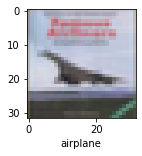

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
classes[y_classes[3]]

'airplane'

Updated Model 

In [ ]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])


cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


cnn2.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 198s 126ms/step - loss: 1.4669 - accuracy: 0.4635
Epoch 2/20
1563/1563 [==============================] - 197s 126ms/step - loss: 1.0090 - accuracy: 0.6464
Epoch 3/20
 670/1563 [===========>..................] - ETA: 1:52 - loss: 0.7768 - accuracy: 0.7331

KeyboardInterrupt: ignored

In [ ]:
cnn2.evaluate(X_test,y_test)

313/313 [==============================] - 10s 31ms/step - loss: 1.5605 - accuracy: 0.6848


[1.5605312585830688, 0.6848000288009644]

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu" , input_shape = (32,32,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
  

    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(10,activation = "softmax")   #Adding the Output Layer
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.5418 - accuracy: 0.4353
Epoch 2/5
1563/1563 [==============================] - 88s 57ms/step - loss: 1.1444 - accuracy: 0.6043
Epoch 3/5
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9598 - accuracy: 0.6728
Epoch 4/5
1563/1563 [==============================] - 89s 57ms/step - loss: 0.8279 - accuracy: 0.7173
Epoch 5/5
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7315 - accuracy: 0.7523


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9002 - accuracy: 0.6928


[0.9002425074577332, 0.692799985408783]

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu" , input_shape = (32,32,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
  

    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(10,activation = "softmax")   #Adding the Output Layer
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

model2.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5716 - accuracy: 0.4225
Epoch 2/10
1563/1563 [==============================] - 90s 57ms/step - loss: 1.1495 - accuracy: 0.6013
Epoch 3/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.9544 - accuracy: 0.6748
Epoch 4/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.8211 - accuracy: 0.7214
Epoch 5/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7041 - accuracy: 0.7631
Epoch 6/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.6120 - accuracy: 0.7906
Epoch 7/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.5259 - accuracy: 0.8229
Epoch 8/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.4540 - accuracy: 0.8490
Epoch 9/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.4025 - accuracy: 0.8645
Epoch 10/10
1563/1563 [==============================] - 88s 56m

In [ ]:
model2.evaluate(X_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.1056 - accuracy: 0.6868


[1.1056476831436157, 0.6868000030517578]